In [1]:
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


# Load InSAR CSV file

In [2]:
%%time
loc1 = r"sentinel1_asc_t088_limburg.csv"

insar_data = pd.read_csv(loc1, sep=',')
display(insar_data.head())

,Unnamed: 0,pnt_id,pnt_flags,pnt_lat,pnt_lon,pnt_line,pnt_pixel,pnt_height,pnt_demheight,pnt_demheight_highres,...,d_20220713,d_20220725,d_20220806,d_20220818,d_20220830,d_20220911,d_20220923,d_20221005,d_20221017,d_20221029
0,8666284,L00012395P00030381,11,50.830029,6.035176,12395,30381,215.67052,221.34067,221.34067,...,0.00017,-0.00903,-0.00341,-0.00538,0.00226,0.00216,0.00246,0.00505,-0.00143,0.00755
1,8667671,L00012396P00030366,101,50.830063,6.034464,12396,30366,222.71645,218.97993,218.97993,...,-0.00405,0.00065,-0.00606,-0.00593,-0.00331,-0.00459,-0.00510,-0.01321,-0.00378,-0.00928
2,8667672,L00012396P00030367,101,50.830044,6.034565,12396,30367,224.24109,219.15625,219.15625,...,-0.00677,-0.00200,-0.00853,-0.00908,-0.00586,-0.00763,-0.01031,-0.01234,-0.00587,-0.01151
3,8667673,L00012396P00030368,101,50.830071,6.034538,12396,30368,222.49604,219.33257,219.33257,...,-0.00430,0.00108,-0.00560,-0.00628,-0.00352,-0.00579,-0.00590,-0.01655,-0.00313,-0.00861
4,8667674,L00012396P00030369,101,50.830078,6.034555,12396,30369,220.54963,219.50887,219.50887,...,-0.00330,0.00158,-0.00489,-0.00538,-0.00317,-0.00518,-0.00550,-0.01635,-0.00192,-0.00798


CPU times: total: 13.6 s
Wall time: 13.7 s


In [3]:
# Display all columns from the csv file to see all information that is in the .csv file
print(insar_data.columns.tolist())

['Unnamed: 0', 'pnt_id', 'pnt_flags', 'pnt_lat', 'pnt_lon', 'pnt_line', 'pnt_pixel', 'pnt_height', 'pnt_demheight', 'pnt_demheight_highres', 'pnt_geoid', 'pnt_incidangle', 'pnt_enscoh', 'pnt_ampconsist', 'pnt_quality', 'pnt_linear', 'pnt_quadratic', 'pnt_seasonal_cos', 'pnt_seasonal_sin', 'pnt_ds_nr_neighbors', 'd_20171001', 'd_20171007', 'd_20171019', 'd_20171031', 'd_20171112', 'd_20171124', 'd_20171206', 'd_20171218', 'd_20171230', 'd_20180111', 'd_20180123', 'd_20180204', 'd_20180216', 'd_20180228', 'd_20180312', 'd_20180324', 'd_20180405', 'd_20180417', 'd_20180429', 'd_20180511', 'd_20180523', 'd_20180604', 'd_20180616', 'd_20180628', 'd_20180710', 'd_20180722', 'd_20180803', 'd_20180815', 'd_20180827', 'd_20180902', 'd_20180908', 'd_20180920', 'd_20181002', 'd_20181014', 'd_20181026', 'd_20181107', 'd_20181119', 'd_20181201', 'd_20181213', 'd_20181225', 'd_20190106', 'd_20190118', 'd_20190130', 'd_20190211', 'd_20190223', 'd_20190307', 'd_20190319', 'd_20190331', 'd_20190412', '

In [4]:
# Extract the dates from the .csv file
dates = pd.to_datetime(insar_data.filter(regex='^d_20').columns, format='d_%Y%m%d')

# Extract the displacement data from the .csv file
displacement_data = insar_data.filter(regex='^d_20')


In [5]:
# Calculate the nr of days between the observations where the first observations is day 0
days = (dates- dates[0]).days
years = days/365


Text(0, 0.5, 'Latitude')

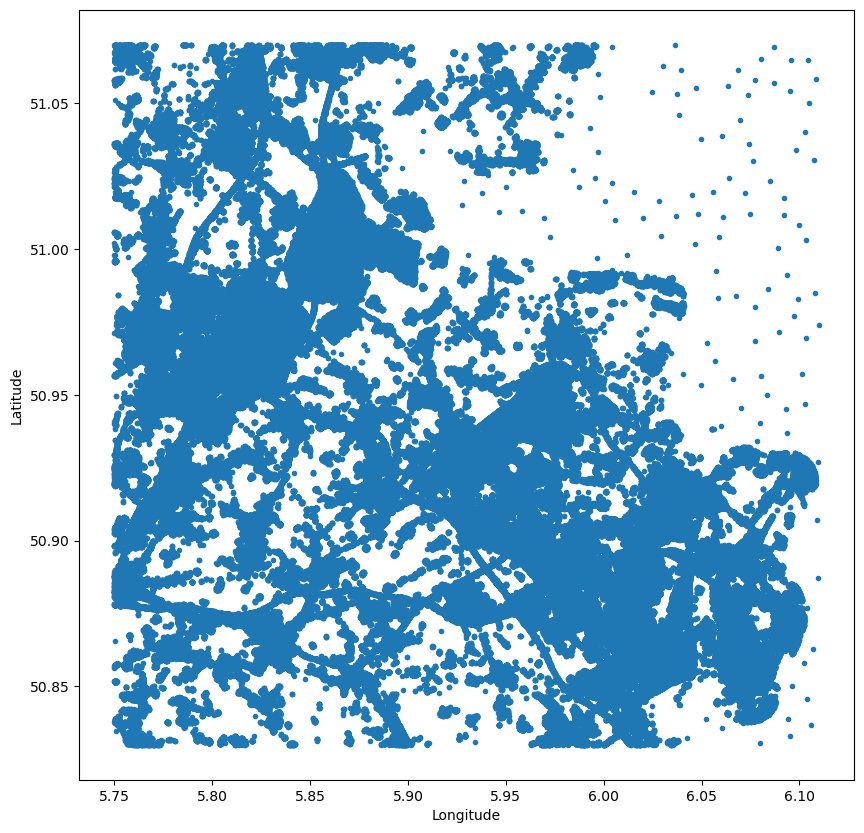

In [6]:
# Plot the location of the points
plt.figure(figsize = (10,10))
plt.plot(insar_data.pnt_lon, insar_data.pnt_lat, '.')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Text(0.5, 0, 'Date')

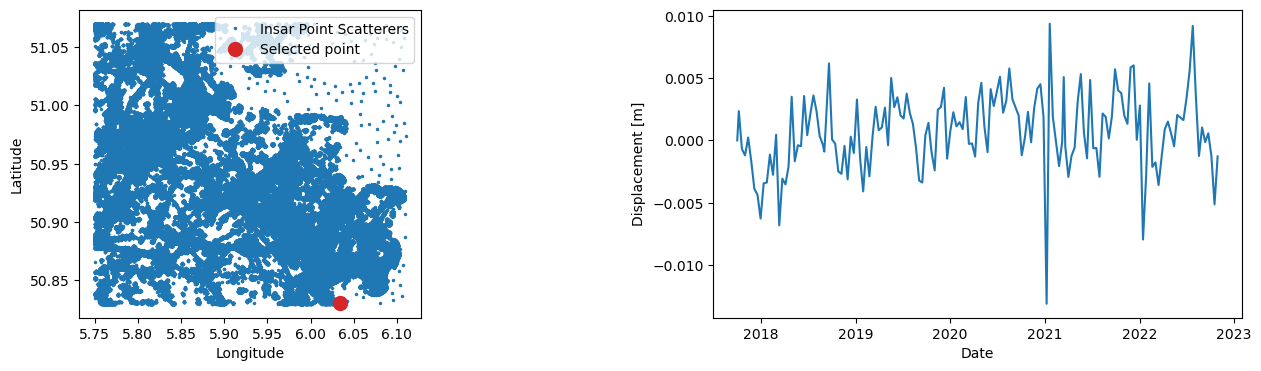

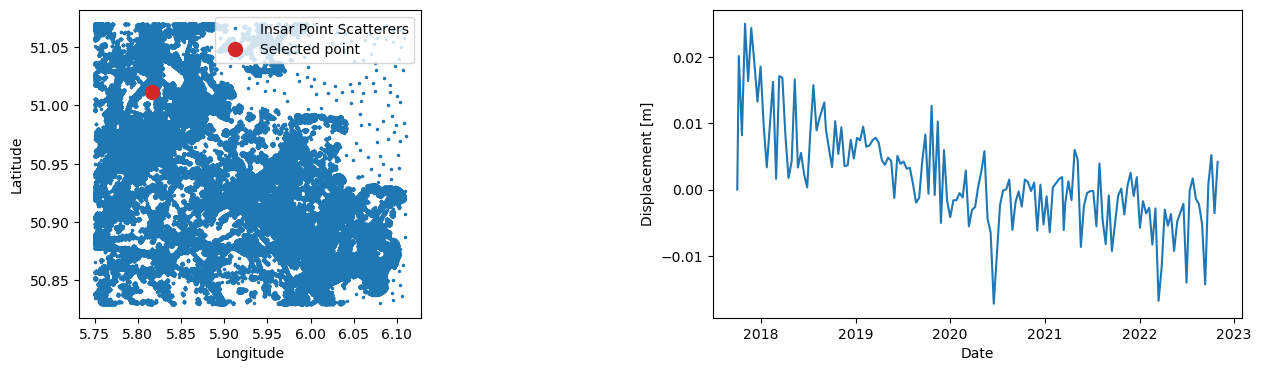

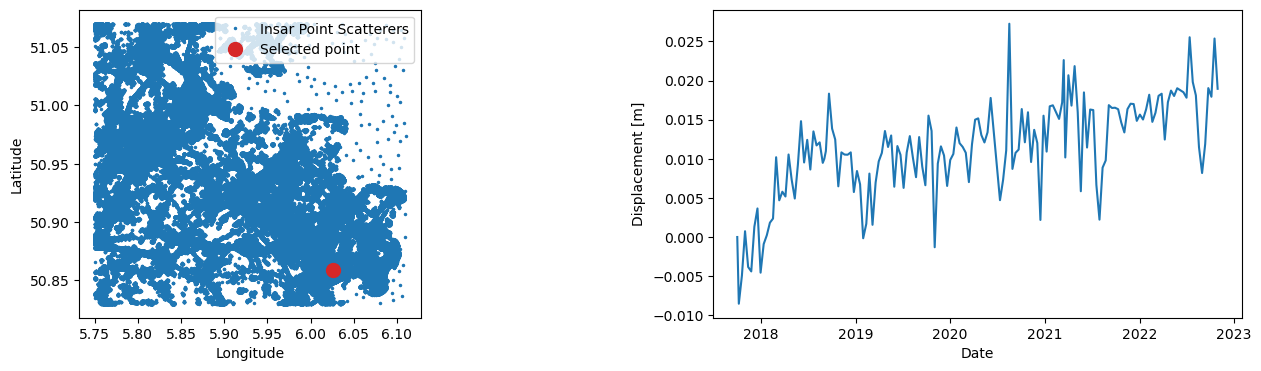

In [7]:
# Plot a timeseries

# Change the pnt_indx value to plot another time series
pnt_idx = 20

plt.figure(figsize = (15,4))
plt.subplot(131)
plt.plot(insar_data.pnt_lon, insar_data.pnt_lat, '.', label = 'Insar Point Scatterers', markersize = 3)
plt.plot(insar_data.pnt_lon.iloc[pnt_idx], insar_data.pnt_lat.iloc[pnt_idx], '.', 
         color = 'tab:red', markersize = 20, label = 'Selected point')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.subplot(122)
plt.plot(dates, displacement_data.iloc[pnt_idx, :])
plt.ylabel('Displacement [m]')
plt.xlabel('Date')


# Change the pnt_indx value to plot another time series
pnt_idx = 945445

plt.figure(figsize = (15,4))
plt.subplot(131)
plt.plot(insar_data.pnt_lon, insar_data.pnt_lat, '.', label = 'Insar Point Scatterers', markersize = 3)
plt.plot(insar_data.pnt_lon.iloc[pnt_idx], insar_data.pnt_lat.iloc[pnt_idx], '.', 
         color = 'tab:red', markersize = 20, label = 'Selected point')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.subplot(122)
plt.plot(dates, displacement_data.iloc[pnt_idx, :])
plt.ylabel('Displacement [m]')
plt.xlabel('Date')



# Change the pnt_indx value to plot another time series
pnt_idx = 76432

plt.figure(figsize = (15,4))
plt.subplot(131)
plt.plot(insar_data.pnt_lon, insar_data.pnt_lat, '.', label = 'Insar Point Scatterers', markersize = 3)
plt.plot(insar_data.pnt_lon.iloc[pnt_idx], insar_data.pnt_lat.iloc[pnt_idx], '.', 
         color = 'tab:red', markersize = 20, label = 'Selected point')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.subplot(122)
plt.plot(dates, displacement_data.iloc[pnt_idx, :])
plt.ylabel('Displacement [m]')
plt.xlabel('Date')